In [1]:
import numpy as np
import tensorflow as tf

# Data preprocessing

First let's load the MNIST dataset of hand-written digits from `tensorflow`.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


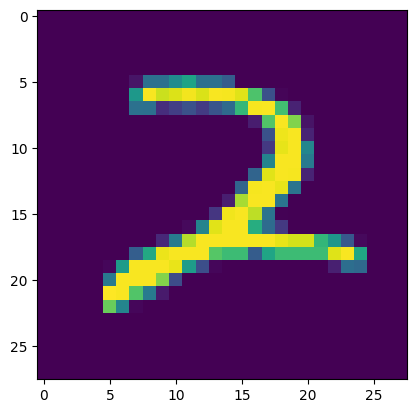

In [3]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(x_train[np.random.randint(0,x_train.shape[0]),:],(28,28)))

Next let's encode the data using the feature map $\Phi (p) = (p, 1-p)^T$ and transform the labels to one-hot format.

In [4]:
def data_encoder(data):
  return np.array([1 - data, data]).transpose([1, 2, 0])

def to_one_hot(labels, n_labels=10):
  one_hot = np.zeros((len(labels), n_labels))
  one_hot[np.arange(len(labels)), labels] = 1
  return one_hot

n_labels = len(np.unique(y_train))

# Flatten and normalize
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) / 255.0
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) / 255.0
# Encode
x_train = data_encoder(x_train)
x_test = data_encoder(x_test)
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

print(n_labels)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

10
(60000, 784, 2) (60000, 10)
(10000, 784, 2) (10000, 10)


# Define MPS classifier

Note that our MPS has one more site than the data because of the label tensor. We also have to set the bond dimension which is a hyperparameter and remains constant during training. In a more sophisticated implementation the bond dimension can be adaptively changed according to the complexity of training data by performing some SVD steps. This is currently not implemented but can be added in a future version.

In [5]:
import classifier
mps = classifier.MatrixProductState(n_sites=x_train.shape[1] + 1,
                                    n_labels=n_labels,
                                    d_phys=x_train.shape[2],
                                    d_bond=12)

# Example training

We can train the `mps` object we created using the `training.fit` data. Here we perform a quick training in a small portion of the data without validation.

In [6]:
import training
optimizer = tf.optimizers.Adam(learning_rate=1e-4)

mps, history = training.fit(mps, optimizer, x_train[:1000], y_train[:1000], x_test[:100], y_test[:100],
                            n_epochs=10, batch_size=50, n_message=1)


Epoch: 0
Time: 5.020526170730591
Loss: 2.2756474018096924
Accuracy: 0.132
Validation Accuracy: 0.28

Epoch: 1
Time: 9.9654860496521
Loss: 1.7491366863250732
Accuracy: 0.403
Validation Accuracy: 0.63

Epoch: 2
Time: 15.049395084381104
Loss: 1.059034824371338
Accuracy: 0.685
Validation Accuracy: 0.68

Epoch: 3
Time: 20.151012897491455
Loss: 0.7035541534423828
Accuracy: 0.77
Validation Accuracy: 0.79

Epoch: 4
Time: 25.212619304656982
Loss: 0.4989180862903595
Accuracy: 0.848
Validation Accuracy: 0.8

Epoch: 5
Time: 30.34337019920349
Loss: 0.3561466634273529
Accuracy: 0.89
Validation Accuracy: 0.87

Epoch: 6
Time: 35.48620247840881
Loss: 0.28487488627433777
Accuracy: 0.916
Validation Accuracy: 0.88

Epoch: 7
Time: 40.697208404541016
Loss: 0.25619134306907654
Accuracy: 0.922
Validation Accuracy: 0.83

Epoch: 8
Time: 45.763519048690796
Loss: 0.2346819043159485
Accuracy: 0.93
Validation Accuracy: 0.85

Epoch: 9
Time: 50.84604477882385
Loss: 0.2686259150505066
Accuracy: 0.911
Validation Accur